# Week 2: Introduction to regression problems 

----------------------------------------------------
Machine Learning     Year 2019/2020

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es* and *Pablo M. Olmos olmos@tsc.uc3m.es*

----------------------------------------------------

To begin to understand what is a method or algorithm of machine learning, let's start working with a real problem: house sale-value prediction. For this purpose, we will start by loading **Boston housing dataset** and analyzing what it is made of.... 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Boston housing database

To goal of this problem or dataset is to predict the value of houses in the suburbs of Boston during the 80's using different features. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970.

We can load this dataset from the sklearn repository as follows:


In [0]:
from sklearn.datasets import load_boston
boston = load_boston()


Variable 'boston' is a dictionary from where we can extract the data, the labels or targets, and some information about the feature meaning....  

In [0]:
X = boston.data
Y = boston.target
feature_names = boston.feature_names
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


Now, for instance, from the input data or observations, we can check their dimensions...

In [0]:
print(X.shape)

(506, 13)


Each record (a single each datum) is usually placed in a row; whereas columns are used for features or variables. In this dataset, we have 506 records or observations, and each one has 13 features.

Here, each record in the database describes a Boston suburb (or town) and it is characterized by a set of features. If we want to know what the are representing, we can check variable 'feature_names' toghether to the sklearn [User Guide](https://scikit-learn.org/stable/datasets/index.html#boston-dataset).


In [0]:
print(feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Besides, we can acces to the target information. 

In [0]:
print(Y.shape)
print(Y[:10])

(506,)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


It's a numpy array with a single column with as many elements as records in X. Each element of Y is associated to a row of X.

Finally, we can try to analyze the relationship between each input feature and the target variable by plotting Y vs. each feature....

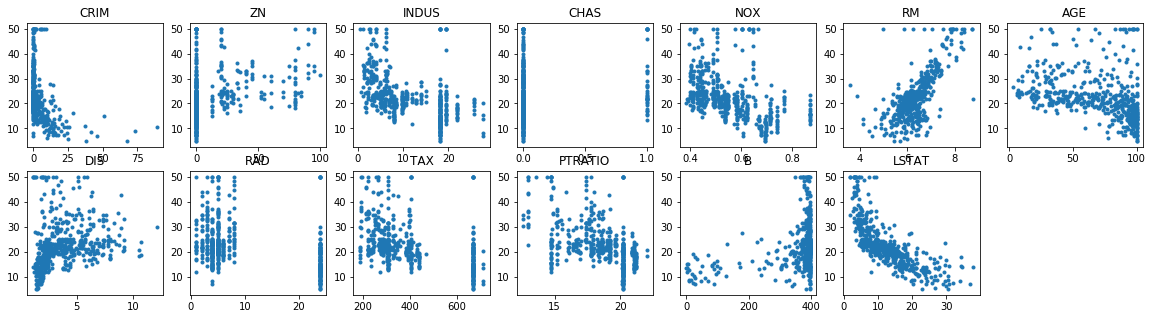

In [0]:
import matplotlib.pyplot as plt
#%matplotlib inline

D = X.shape[1]

plt.figure( figsize=(20,5))
for d in range (D):
  plt.subplot(2,7,d+1)
  plt.plot(X[:,d],Y,'.',)
  plt.title(feature_names[d])


Which variables are most useful to predict the house sale prize?



# Machine Learning Pipeline

When we have to design a regressor (or classifier) to solve a data analysis problem, we usually follow these steps:

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/MLPipeline.png" width="100%" > 


In the **preprocessing** step we can find several tasks:
* Imputation of missing values
* Dimensionality reduction: feature extraction or feature selection
* Data normalization: Main step, consist in flatten the date so they move in the same range.

Along this course, we will review all these techniques. But for now, let's start with the data normalization.

# Preparing the dataset

Folowing the ML pipeline, before desinging any ML regressor to predict the house sale-prize, we need:
1. Generate the train and test partitions.  
2. Normalize the data variables (preprocessing).
3. Any additional preprocessing (in this case, feature selection).


## Generating training/test partitions
This task consist in dividing the overall datasets into two independt subsets:
* The **training subset**: used to train the ML model. We will later see that this subset can be divided into diferent (validation) subsets if hiperparameters of the ML model have to be adjusted.
* The **test subset**: exclusively used for performance evaluation.

This division usually depends on the avaliable number of data, but 60/40\%, 70/30\% or 80/20\% train/test divisions are quite common.

For this task, we can use some preprocessing tools from sklearn; for instance, we can use the function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).



In [0]:
from sklearn.model_selection import train_test_split

# Parameter test_size lest you select the percentage of data into the test partition (in this case 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

print('Partition shapes:')
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('Y_train: ', Y_train.shape)
print('Y_test: ', Y_test.shape)

# Note that we have to divide both observations and labels!!!

Partition shapes:
X_train:  (303, 13)
X_test:  (203, 13)
Y_train:  (303,)
Y_test:  (203,)


## Normalizing our input data

Next step implies data normalization. In general, features are defined in different ranges. I.e., if $x_1$ for instance can take values in the $[-1,1]$ set and $x_2$ in the $[-10^6,10^6]$ range. To improve numerical robustness of ML methods, we usually apply a linear normalization preprocessing stage to use as input to ML model features with (sample) mean 0 and (sample) variance equal to 1. 



Let's check the mean and standard deviation of our training data

In [0]:
# Analyze mean and std of each feature
print('Mean values')
print(np.mean(X_train, axis=0))

print('Std values')
print(np.std(X_train, axis=0))

Mean values
[3.40540868e+00 1.20775578e+01 1.11100000e+01 6.93069307e-02
 5.56296700e-01 6.30460396e+00 6.93155116e+01 3.75517327e+00
 9.33663366e+00 4.03498350e+02 1.84610561e+01 3.61424488e+02
 1.24990099e+01]
Std values
[8.60663336e+00 2.44061770e+01 7.02660005e+00 2.53975353e-01
 1.17627933e-01 7.12938382e-01 2.84517980e+01 2.08860343e+00
 8.67066359e+00 1.70369234e+02 2.20521469e+00 8.37407634e+01
 7.11658749e+00]


**Normalization process**

Given the unnormalized feature matrix $\mathbf{X}_{N\times D}$, we compute the sample mean per feature column , $\mu_j$, and the sample variance per  feature column, $\sigma^2_j$ for $j=1,\ldots,D$. Then, each row of the normalized feature matrix $\overline{\mathbf{X}}_{N\times D}$ is obtained as follows:

$$\overline{\mathbf{x}}^{(i)}= \left[\frac{x_1^{(i)}-\mu_1}{\sqrt{\sigma^2_1}}, ~~ \frac{x_2^{(i)}-\mu_2}{\sqrt{\sigma^2_2}}, \ldots, \frac{x_D^{(D)}-\mu_D}{\sqrt{\sigma^2_D}}\right]$$

We need to compute $\sigma$ and $\mu$ per feature in order to compute the new values. The normalization has to be done with the training data, this means that later, when we need to normalize the test data, we'll use the $\sigma$ and $\mu$ per feature computed with the training data.

One last thing, in general we will not normalize the output variable $y$. We can do it and but typically it leads to mistakes in the evaluation of the cost function. 

To carry out this proccess we can also use other of the sklearn preprocessing tools: the object [StandardScalerStandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)


In [0]:
# Data normalization

from sklearn.preprocessing import StandardScaler

# Define the object
transformer = StandardScaler()
transformer.fit(X_train)  # fit does nothing, just learns mean and std from data

#Now we use the mean and standart deviation calculated from the training data and we use it to compute the normalization in training and test set
X_train_norm = transformer.transform(X_train) 
X_test_norm =  transformer.transform(X_test)


One important thing, we normalize the test data using the sample means and variances computed from the **training** set. This is important to **make sure that all datapoints are equally normalized**.

Check mean and std of the normalized data

In [0]:
#We can check now that, after normalization, the means have changed and the std deviation is always 1

#print('Mean values')
#print(np.mean(X_train_norm, axis=0))

#print('Std values')
#print(np.std(X_train_norm, axis=0))

print(X_train_norm)

[[-0.39129454  2.78300211 -1.3648137  ... -2.65781655  0.36750933
  -0.82609958]
 [-0.11921836 -0.4948566   1.2054194  ... -1.70552832 -2.25116754
   2.15004595]
 [-0.23964872 -0.4948566   1.2054194  ... -1.70552832 -0.08997396
  -0.85279776]
 ...
 [-0.37813028 -0.4948566  -0.15654797 ... -0.2997695   0.39509446
  -0.3089978 ]
 [-0.36903381 -0.4948566  -0.59772863 ... -0.25442244  0.3739578
   0.88539488]
 [-0.37950596 -0.4948566  -1.00475336 ... -0.84393421  0.42363492
   0.30787089]]


### Exercise 1

Desing your own normalization proccess

In [0]:
# <SOL>

X_train_norm_sol = (X_train - np.mean(X_train, axis=0))/np.std(X_train, axis=0)
X_test_norm_sol = (X_test - np.mean(X_train, axis=0))/np.std(X_train, axis=0)

# </SOL>
#Numpy realizes that X_train is a (400, 13) and the mean a 13 element vector. So since the number of columns is the same, it makes the operation for each line of the matrix
#The same happens with the standard deviation

## Other preprocesing tools: Feature selection
Other possible preprocessing step can be a feature selection. This consists in selecting a subset of the original features which seem to be more usefull to solve the predicition task. 

There are many sophisticated methods to carry out this task (we wiil review some of them along this course), but now, simply from the above display (variables vs. target values), let's select the variables:
* Feature 0: CRIM
* Feature 5: RM
* Feature 12: LSTAT 


In [0]:
sel_feat = [0, 5, 12]
X_train_sel = X_train_norm[:,sel_feat]
X_test_sel = X_test_norm[:,sel_feat]

Note that the feature selection is not affecting to the target vectors.

For the sake of simplicity, from now on, let's consider that train and test data are the preprocessed versions.

In [0]:
X_train = X_train_sel
X_test = X_test_sel

# The ML model

Consider we have a **training** database of $N$ entries of the form $(\mathbf{x}^{(i)},y^{(i)})$, where $\mathbf{x}\in\mathbb{R}^{D}$ is an observation  and $y \in\mathbb{R}$  is its target value. Our goal is to design a  function $f(\mathbf{x}^*)$  able to estimate the associated target value for a new point $\mathbf{x}^*$ as follows

\begin{align}
y^* \approx f(\mathbf{x}^*)
\end{align}

Note that in the above equation we are using the $\approx$ because we consider that the estimation is not goint to be perfect, i.e.,  the designed function will have an estimation error. As we will see later, a good design will try to minimize this error.

## My first estimation model:  K-NN (Nearest Neighbours) 

K-NN is a *non-parametric* method, since there are not parameters to be learned. To estimate the output a new sample $\mathbf{x}^*$, you only have to:
* Select the value of K.
* Search, among the training data, the K nearest neighbours of $\mathbf{x}^*$
* Compute the estimated target  $\mathbf{x}^*$ as the average value of the targets associated to the K-nearest neighbours of $x^*$. 
That is,

\begin{align}
f(\mathbf{x}^*) =\frac{1}{K}\sum_{k\in \mathcal{S}_{K}(\mathbf{x}^*)} y^{(k)},
\end{align}
where $\mathcal{S}_{K}$ is the set of the **$K$ training points that are closest to $\mathbf{x}^*$ according to a given distance metric $d(\mathbf{x}^{(i)},\mathbf{x}^*)$**. For instance, in real spaces the most common choice is the **euclidean distance**:

\begin{align}
d(\mathbf{x}^{(i)},\mathbf{x}^*) = \left|\left|\mathbf{x}^{(i)}-\mathbf{x}^*\right|\right|^2
\end{align}


**Some comments on K-NN**

1. There are many variants of the above expression. For instance, we can **weight differently the regression values according to the distance**. In this way, the closest points has a bigger influence in the regression value:

\begin{align}
f(\mathbf{x}^*) =\frac{1}{K}\sum_{k\in \mathcal{S}_{K}(\mathbf{x}^*)}  \frac{d(\mathbf{x}^{(k)},\mathbf{x}^*)}{\sum_{q\in \mathcal{S}_{K}} d(\mathbf{x}^{(q)},\mathbf{x}^*) } y^{(k)}
\end{align}


2. The K-NN complexity is determined by the [**search of the set of closest neighbors**](https://en.wikipedia.org/wiki/Nearest_neighbor_search). This complexity grows as $\mathcal{O}(DN)$, where $D$ is the dimension and $N$ is the number of points. Researches in computer science have developed many approximate lower-complexity algorithms to perform this task in high dimension spaces. The most common ones are [**k-d trees**](https://en.wikipedia.org/wiki/K-d_tree) and [**Local Sensitive Hashing**](https://en.wikipedia.org/wiki/Locality-sensitive_hashing).


## Model evaluation

In regression problems, it is quit common using the Mean Square Error (MSE) as performance measurement of our model. In fact, we can consider the following two metrics to diagnose how well our model is performing:

- **Training MSE**: Considering $f({\bf x}^*)$ is the regressor output for the data ${\bf x}^*$, the MSE over the training data is defined as:
$$MSE_{train} = \frac{1}{N} \sum_{i=1}^{N} \left(y^{(i)}-f({\bf x}^{(i)})\right)^2$$

- **Test MSE**: evaluating the same measurement over the test data, we have that
\begin{align}
MSE_{test} =  \frac{1}{N_{test}}\sum_{i=1}^{N_{test}} \left(y^{(i)}-f({\bf x}^{(i)})\right)^2
\end{align}

Note that we are interested in evaluating how well our data **generalizes to data we have never seen!** This is the real point of Machine Learning! Learn from data to adapt! To emulate this effect, we have a test-database **which is never used for model training!** and is only used to evaluate generalization. So, the test error informs about the generalization capability of our regressor.


### Exercise 2 
Implement your own K-NN regressor (with $K=5$) to predict the house sale-prize. Obtain the predictions over the test data set and evaluate the regression performance computing the MSE over the test data.

You can use the function [euclidean_distances](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html) to compute the euclidean distances of each test point to the training data.

#### SOLUTION

In [0]:
# <SOL>
from numpy import array, newaxis
from sklearn.metrics.pairwise import euclidean_distances

#En primer lugar calculamos la distancia euclídea entre los datos de test y los de entrenamiento
#para luego ordenarlos de menor a mayor y coger los índices (np.argsort devuelve índices) de los
#K = 5 elementos con la distancia euclídea menor

fiveNN = np.argsort(euclidean_distances(X_test, X_train), axis = 1)[:, :5]

#Después se suman los precios cuyos índices coinciden con los obtenidos en el paso anterior y se
#divide entre 5 para obtener la media. De esta manera obtenemos la predicción de los casos de test.

predictions = np.sum(Y_train[fiveNN], axis = 1)/5
print(predictions)

#Una vez realizadas las predicciones, hemos de evaluar cuán bueno es nuestro modelo predictivo.

mseTest = np.sum(pow((Y_test - predictions), 2))/(Y_test.size)

# </SOL>


[22.5  20.32 22.44 13.   22.54 20.9  23.18 21.38 18.32 22.44  7.18 10.98
 15.34 13.02 47.54 31.46 20.44 34.82 25.58 21.34 23.04 20.98 21.5  24.06
 20.14 23.56 19.36 18.02 47.22 18.08 15.4  17.6  24.22 22.56 23.1  18.2
 10.88 22.7  14.58 13.96 25.02 20.82 25.04 12.06 24.28 23.1  19.78 19.32
 15.72 25.48 20.   16.   20.06 45.62 18.74 18.92 19.08 20.98  9.06 17.64
 21.4  21.04 29.2  26.32 15.36 27.86 14.4  16.72 12.36 20.38 20.64 22.96
 24.12 33.58 30.86 12.52 45.62 21.66 22.94 20.82 27.22 19.64 16.5  45.62
 42.48 23.5  20.24 15.36 25.02 17.82 19.22 12.58 23.68 28.12 20.98 25.04
 12.52 23.94 14.94 20.8  23.1  20.5  28.2  21.5  25.02 20.12 10.06 18.38
 25.04 23.42 29.8  11.36 16.88 19.98 16.52 18.4   9.88 20.8  12.28 47.54
 30.18 11.94 17.72 19.14 21.5  19.74 34.28 16.26 20.   33.98 15.18 12.34
 17.92 18.92 13.42 34.34 20.48 18.42 26.62  9.78 10.16 20.54 29.2  25.58
 23.7  20.38 35.5  34.36 14.02 11.3  27.38 23.64 15.72 25.96 17.78 24.06
 18.44 16.84 21.64 14.    9.76 21.22 29.8  35.2  33.

### Exercise 3
Use the sklearn [K-NN regression](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) function to train and obtain the test predictions and check that you obtain the same MSE. Of couse, set $K=5$.

#### SOLUTION

In [0]:
# <SOL>
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(5)
neigh.fit(X_train, Y_train)

neigh.predict(X_test)
# </SOL>

array([22.5 , 20.32, 22.44, 13.  , 22.54, 20.9 , 23.18, 21.38, 18.32,
       22.44,  7.18, 10.98, 15.34, 13.02, 47.54, 31.46, 20.44, 34.82,
       25.58, 21.34, 23.04, 20.98, 21.5 , 24.06, 20.14, 23.56, 19.36,
       18.02, 47.22, 18.08, 15.4 , 17.6 , 24.22, 22.56, 23.1 , 18.2 ,
       10.88, 22.7 , 14.58, 13.96, 25.02, 20.82, 25.04, 12.06, 24.28,
       23.1 , 19.78, 19.32, 15.72, 25.48, 20.  , 16.  , 20.06, 45.62,
       18.74, 18.92, 19.08, 20.98,  9.06, 17.64, 21.4 , 21.04, 29.2 ,
       26.32, 15.36, 27.86, 14.4 , 16.72, 12.36, 20.38, 20.64, 22.96,
       24.12, 33.58, 30.86, 12.52, 45.62, 21.66, 22.94, 20.82, 27.22,
       19.64, 16.5 , 45.62, 42.48, 23.5 , 20.24, 15.36, 25.02, 17.82,
       19.22, 12.58, 23.68, 28.12, 20.98, 25.04, 12.52, 23.94, 14.94,
       20.8 , 23.1 , 20.5 , 28.2 , 21.5 , 25.02, 20.12, 10.06, 18.38,
       25.04, 23.42, 29.8 , 11.36, 16.88, 19.98, 16.52, 18.4 ,  9.88,
       20.8 , 12.28, 47.54, 30.18, 11.94, 17.72, 19.14, 21.5 , 19.74,
       34.28, 16.26,

## Analyzing prediction curve

The K-NN model is learning a function to map from an observation to a predicted value (an estimation of the house sale-prize). In case, we are working with unidimensional observations, we can plot this prediction function. 

Next cell analizes the prediction function ${y^*}=f({\bf x}^*)$ when we select a single input variable (feature 12: LSTAT, after the previous feature selection, this is feature #2). 

MSE using a single input feature:
30.30166976600985


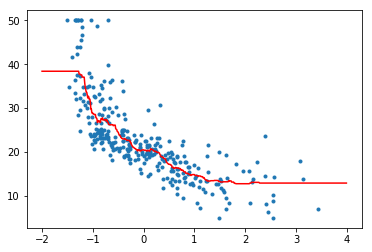

In [0]:
# Analize the regresion function

# We select a single feature 

Id_feat = 2 #LSTAT

# We train and evaluate the model with the unidimensional observation
neigh.fit(X_train[:,Id_feat][:,np.newaxis], Y_train) 
f_test=neigh.predict(X_test[:,Id_feat][:,np.newaxis])
MSE_KNN = np.mean((Y_test-f_test)**2)
print('MSE using a single input feature:')
print(MSE_KNN)

# Plot the training data
plt.figure()
plt.plot(X_train[:,Id_feat][:,np.newaxis], Y_train, '.')
# Plot the regression function
## Define a range of equispaced values of x
X_plot = np.arange (-2,4,0.01)
## Obtain the output of the prediction funcion for these values
f_plot=neigh.predict(X_plot[:,np.newaxis])
## Plot them
plt.plot(X_plot,f_plot, 'r')
plt.show()

# Analyzing the influece of parameter K

For now, we have prefixed a value for the K parameter ($K=5$) and we have analyzed the K-NN for this value. But, can another K value provide a different performance? 


### Exercise 4

Analyze the performance of the K-NN regressor for a range of values of K from 1 to 40. Analyze this performance over the train and test MSE.

#### SOLUTION

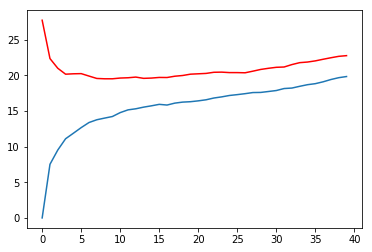

Best K = 9
MSE = 19.532072006324878


In [0]:
# <SOL>
bestK = 0
bestMSE = 100
arrayMSEtest = []
arrayMSEtrain = []

for i in range (1, 41):
  neigh = KNeighborsRegressor(i)
  neigh.fit(X_train, Y_train) 
  MSE_test = np.mean((Y_test-neigh.predict(X_test))**2)
  MSE_train = np.mean((Y_train-neigh.predict(X_train))**2)
  arrayMSEtest.append(MSE_test)
  arrayMSEtrain.append(MSE_train)
  if (bestMSE > MSE_test):
      bestMSE = MSE_test
      bestK = i

plt.figure()
plt.plot(arrayMSEtrain)
plt.plot(arrayMSEtest, 'r')
plt.show()
print('Best K =', bestK)
print('MSE =', bestMSE)

# </SOL>

How can I select the optimum K value?
Can I use the training MSE? 

The lower the MSE the better. We can, but we shouldn't, because the training MSE doesn't give us information about how well our model generalizes. Therefore, the optimum value of K between 1 and 40 in our case is K = 9.

Q: Why training MSE grows with the value of K?

Pues con esto no podemos conseguir el valor óptimo de K. El conjunto de test no lo puedo usar.

Por otro lado, no podemos usar los datos de entrenamiento porque hemos usado todos y eso me provoca que si uso el K óptimo según los datos de entrenamiento, el sobreajuste sería inevitable.


# Parameter selection: Cross Validation

In order to fit $K$, we will split the training set once more, to create the **validation set**:

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/validation_set.png" width="70%" > 


The validation set will be used to choose the best $K$ among the same model with different $K$ values, all trained using the training set. This process is known as **cross validation**.

-----

**Cross Validation Steps**:

1) Select a ML model, for instance a K-NN regressor, and construct the normalized feature matrix for both the training, validation and test sets. 

2) Set a grid of $K$ values to test (i.e. $1, 2,3,4,5,6,7,8,....20$)

3) Train the ML model for each $K$ value **using only the training set**. For each, $K$ value we get a model $f_{K}()$.

4) Compute the validation MSE (or other performance measurement) for each model:

$$MSE_{val}(K) = \frac{1}{N_{val}} \sum_{i=1}^{N_{val}} \left(y^{(i)}-{f_K}({\bf x}^{(i)})\right)^2$$

Recall, both the validation and test sets are normalized using the train set statistics.

5) Select $K^*$ that minimizes the validation error 

6) Retrain the model for $K^*$ using **both the training and validation sets**. So, you get a new model $f_{K^*}()$

7) Compute the final test MSE:

$$MSE_{test}(K^*) = \frac{1}{N_{test}} \sum_{i=1}^{N_{test}} \left(y^{(i)}-{f_{K^*}}({\bf x}^{(i)})\right)^2$$

--- 

Unless the dataset is large enough (and so does the validation set), the robustnetss of the above procedure is improved by averaging the validation MSE (step 4) over multiple random partitions of the validation/training set (**Repeated random sub-sampling validation**) or splits the training set in K-folds and averages the results using one of the folds as validation set at a time (**K-fold cross validation**). See the [Wikipedia entry](https://en.wikipedia.org/wiki/Cross-validation) about CV for more details. 



### Exercise 5.1

Now, apply a 10 fold cross validation (CV) process to select the optimum value of K from a range of values from 1 to 40. You can use the [GridSearchCV( )](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) function to implement it. 

Note: Define the scoring parameter of GridSerch as 'neg_mean_squared_error' (to minimize the MSE during the CV)

#### SOLUTION

In [0]:
# <SOL>
import sklearn
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV 

rangeK = np.arange(1, 41)
param = [{'n_neighbors': rangeK}]

clf_base = KNeighborsRegressor()
clf = GridSearchCV(KNeighborsRegressor(), param, cv = 10, scoring = 'neg_mean_squared_error')
clf.result = clf.fit(X_train, Y_train)

print('CV finished')
# </SOL>

CV finished


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Analyzing CV output
After running the CV process, the estimator object contains the information of the CV process (next cell explore the parameter ".grid\_scores\_" to obtain this information).

Cross validation results:
For K = 1, validation accuracy is -3076.02 (+/-913.373)%
For K = 2, validation accuracy is -2224.55 (+/-739.630)%
For K = 3, validation accuracy is -1979.96 (+/-733.131)%
For K = 4, validation accuracy is -1911.17 (+/-686.620)%
For K = 5, validation accuracy is -1790.66 (+/-611.498)%
For K = 6, validation accuracy is -1860.05 (+/-599.450)%
For K = 7, validation accuracy is -1817.74 (+/-607.165)%
For K = 8, validation accuracy is -1800.23 (+/-618.552)%
For K = 9, validation accuracy is -1809.90 (+/-614.585)%
For K = 10, validation accuracy is -1819.84 (+/-599.990)%
For K = 11, validation accuracy is -1828.56 (+/-593.645)%
For K = 12, validation accuracy is -1815.86 (+/-569.176)%
For K = 13, validation accuracy is -1809.94 (+/-555.926)%
For K = 14, validation accuracy is -1797.87 (+/-555.485)%
For K = 15, validation accuracy is -1804.82 (+/-538.061)%
For K = 16, validation accuracy is -1820.85 (+/-536.628)%
For K = 17, validation accuracy is -1833.65 (+/-530.762

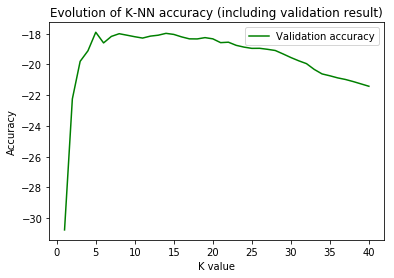

In [0]:
# Printing results
print("Cross validation results:")

paramsFolds = clf.cv_results_['params']
meanScoreFolds = clf.cv_results_['mean_test_score']
stdScoreFolds = clf.cv_results_['std_test_score']


for i, K in enumerate(rangeK):
    params = paramsFolds[i]
    mean_score = meanScoreFolds[i]
    std_score = stdScoreFolds[i]
    print("For K = %d, validation accuracy is %2.2f (+/-%1.3f)%%" 
          % (params['n_neighbors'], 100*mean_score, 100*std_score / 2))

# Selecting validation error (mean values)
vect_val=meanScoreFolds

# Ploting results
plt.figure()
plt.plot(rangeK, vect_val,'g', label='Validation accuracy')
plt.legend()
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('Evolution of K-NN accuracy (including validation result)')
plt.show()

## Exercise 5.2

Examine the fields ".best\_estimator\_" and ".best\_params\_" of the estimator generated by the CV process:
* ".best\_estimator\_" contains  the final estimator trained with this select value.
* ".best\_params\_" is a dictionary with the selected parameters. In our example, "best\_params\_['n\_neighbors']" would provide the selected value of K.

Save the selected value of K in variable denoted "K_opt" and compute the test error of the final estimator.

### SOLUTION

In [0]:
# <SOL>
K_opt = clf.best_params_.get('n_neighbors')
print(clf.best_estimator_)
# </SOL>

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


Note that you can also compute the KNN output directly over the estimator object returned by the CV process:

In [0]:
f_test = clf.predict(X_test)
MSE_test = np.mean((Y_test-f_test)**2) 
print("The test accuracy is %2.2f" %(MSE_test ))

The test accuracy is 20.23


## Exercise 5.3  Advanced work

Complete the following code to implement the CV process without using GridSearchCV().

You can use the sklearn [Kfold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) function to generate the different validation folds.

### SOLUTION

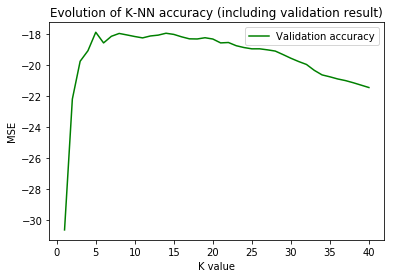

In [0]:
# <SOL>
num_fold = 10
kfold = KFold(num_fold)
arrayMSE = []
acumMSE = 0

for K in rangeK:
  for train, val in kfold.split(X_train):
    neigh = KNeighborsRegressor(n_neighbors= K)
    neigh.fit(X_train[train], Y_train[train]) 
    MSE = - np.mean((Y_train[val]-neigh.predict(X_train[val]))**2)
    acumMSE += MSE
    average_MSE = acumMSE/num_fold

  arrayMSE.append(average_MSE)
  acumMSE = 0


plt.figure()
plt.plot(rangeK, arrayMSE,'g', label='Validation accuracy')
plt.legend()
plt.xlabel('K value')
plt.ylabel('MSE')
plt.title('Evolution of K-NN accuracy (including validation result)')
plt.show()
# </SOL>

# Performance evaluation

The last step of the ML pipeline is the performance evaluation. So far, we have used the MSE as performance measurement, but we can find other metrics. In fact, sklearn models include a wide variety of [metrics for regression problems](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics). The most frequent are:
* Mean Square Error (MSE)
$$MSE = \frac{1}{N} \sum_{i=1}^{N} \left(y^{(i)}-f({\bf x}^{(i)})\right)^2$$

* Mean Absolute Error (MAE)
$$MAE = \frac{1}{N} \sum_{i=1}^{N} \left|y^{(i)}-f({\bf x}^{(i)})\right|$$

* R2-score (R2)
$$R2 =  1- \frac{ \sum_{i=1}^{N} \left(y^{(i)}-f({\bf x}^{(i)})\right)^2}{\sum_{i=1}^{N} \left(y^{(i)}-\bar{y}\right)^2}$$

where $\bar{y} = \frac{1}{N} \sum_{i=1}^{N} y^{(i)}$ (mean value of the targets).

The R2 score is the default measurement used by sklearn regression methods. It has the advantage of being more interpretable, since the best possible score is 1.0, a constant model that always predicts the expected value of y would get a score of 0.0, and models working even worse that this constant model can provide negative values. 


## Exercise 6

Use the [regression metrics](https://scikit-learn.org/stable/modules/classes.html#regression-metrics) of sklearn to obtain the MSE, MAE and R2  scorings of the K-NN regressor. 

Note that you can also use the .scoring() method of the K-NN model to evaluate the regressor performance, but this method only returns the R2-score. 

In [0]:
# <SOL>
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

bestKNNRegressor = KNeighborsRegressor(n_neighbors= 5)
bestKNNRegressor.fit(X_train, Y_train)
MSE = mean_squared_error(Y_test, bestKNNRegressor.predict(X_test))
R2 = r2_score(Y_test, bestKNNRegressor.predict(X_test))
MAE = mean_absolute_error(Y_test, bestKNNRegressor.predict(X_test))

print('MSE = ', MSE)
print('R2 score = ', R2)
print('MAE = ', MAE)
# </SOL>

MSE =  20.23293793103448
R2 score =  0.7554357095758714
MAE =  2.8953694581280787
